In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
obs = 100000
xs = np.random.uniform(-10,10,size=(obs,1))
zs = np.random.uniform(-10,10,(obs,1))
generated_inputs = np.column_stack((xs,zs))
noise = np.random.uniform(-1,1,(obs,1))
generated_target = 2*xs -3*zs + 5 + noise
np.savez('TF_intro', input = generated_inputs, target = generated_target)


In [ ]:
train = np.load('TF_intro.npz')

In [ ]:
input_size = 2
output_size = 1
model = tf.keras.Sequential([tf.keras.layers.Dense(output_size,
                                                   kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                                                   bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
)
])

In [ ]:
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')
model.fit(train['input'], train['target'], epochs=100, verbose=2)

Epoch 1/100
3125/3125 - 4s - loss: 0.6832 - 4s/epoch - 1ms/step
Epoch 2/100
3125/3125 - 3s - loss: 0.3786 - 3s/epoch - 1ms/step
Epoch 3/100
3125/3125 - 3s - loss: 0.3808 - 3s/epoch - 1ms/step
Epoch 4/100
3125/3125 - 4s - loss: 0.3828 - 4s/epoch - 1ms/step
Epoch 5/100
3125/3125 - 4s - loss: 0.3807 - 4s/epoch - 1ms/step
Epoch 6/100
3125/3125 - 3s - loss: 0.3822 - 3s/epoch - 1ms/step
Epoch 7/100
3125/3125 - 3s - loss: 0.3796 - 3s/epoch - 1ms/step
Epoch 8/100
3125/3125 - 3s - loss: 0.3791 - 3s/epoch - 1ms/step
Epoch 9/100
3125/3125 - 3s - loss: 0.3798 - 3s/epoch - 1ms/step
Epoch 10/100
3125/3125 - 3s - loss: 0.3783 - 3s/epoch - 1ms/step
Epoch 11/100
3125/3125 - 3s - loss: 0.3788 - 3s/epoch - 1ms/step
Epoch 12/100
3125/3125 - 4s - loss: 0.3831 - 4s/epoch - 1ms/step
Epoch 13/100
3125/3125 - 4s - loss: 0.3798 - 4s/epoch - 1ms/step
Epoch 14/100
3125/3125 - 5s - loss: 0.3811 - 5s/epoch - 2ms/step
Epoch 15/100
3125/3125 - 4s - loss: 0.3829 - 4s/epoch - 1ms/step
Epoch 16/100
3125/3125 - 5s - loss

In [ ]:
model.layers[0].get_weights()

[array([[ 2.0125282],
        [-3.040437 ]], dtype=float32), array([4.99828], dtype=float32)]

In [ ]:
model.predict_on_batch(train['input']).round(1)

array([[ 2.6],
       [39.2],
       [ 5.3],
       ...,
       [-6.6],
       [16.7],
       [ 1.7]], dtype=float32)

In [ ]:
train['target'].round(1)

array([[ 2.4],
       [38.7],
       [ 5.2],
       ...,
       [-6. ],
       [16. ],
       [ 1.5]])

Text(0, 0.5, 'target')

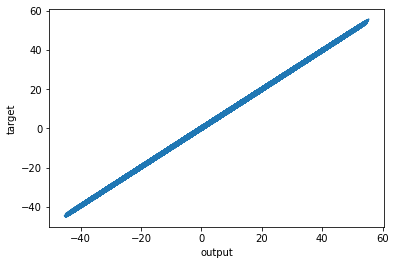

In [ ]:
plt.plot(np.squeeze(model.predict_on_batch(train['input'])), np.squeeze(train['target']))
plt.xlabel('output')
plt.ylabel('target')